## Library Imports

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('seaborn-v0_8-pastel')

import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [87]:
data = pd.read_csv('data/raw/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

In [39]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [41]:
print(data.shape)
print(data.nunique())

(21613, 21)
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


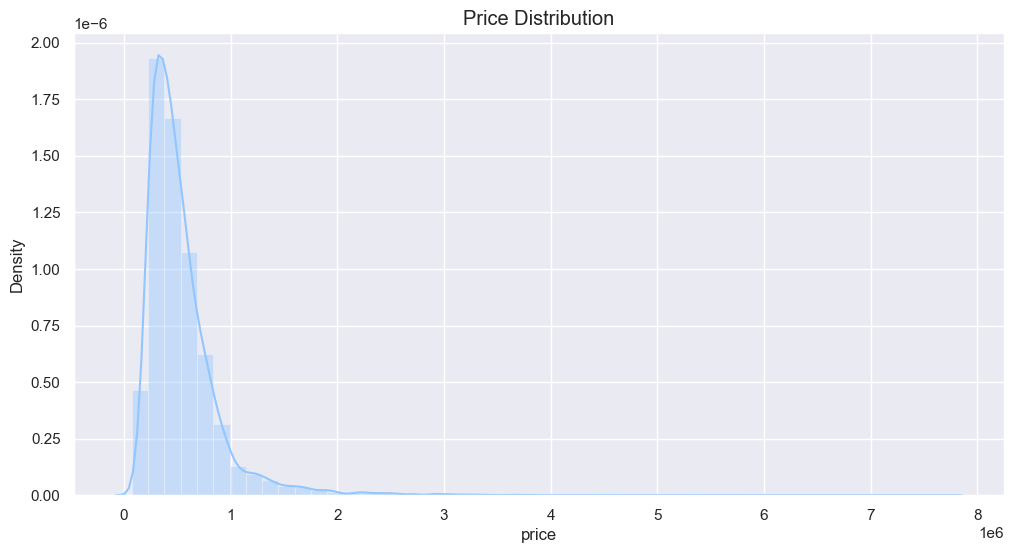

In [67]:
plt.figure(figsize=(12, 6))
plt.title('Price Distribution')
sns.distplot(data['price'])
plt.show()

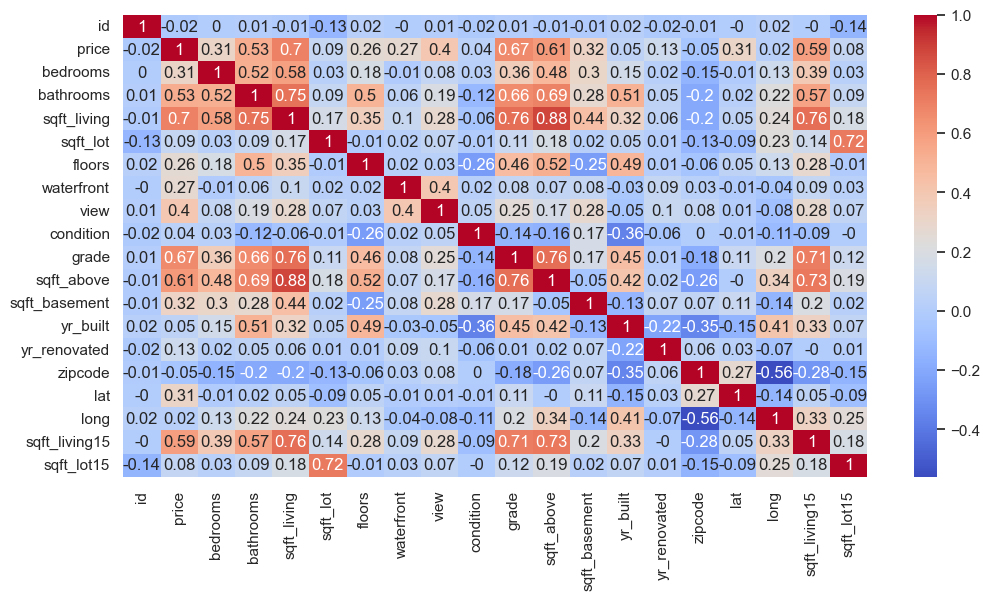

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(numeric_only=True).round(2), annot=True, cmap='coolwarm')
plt.show()

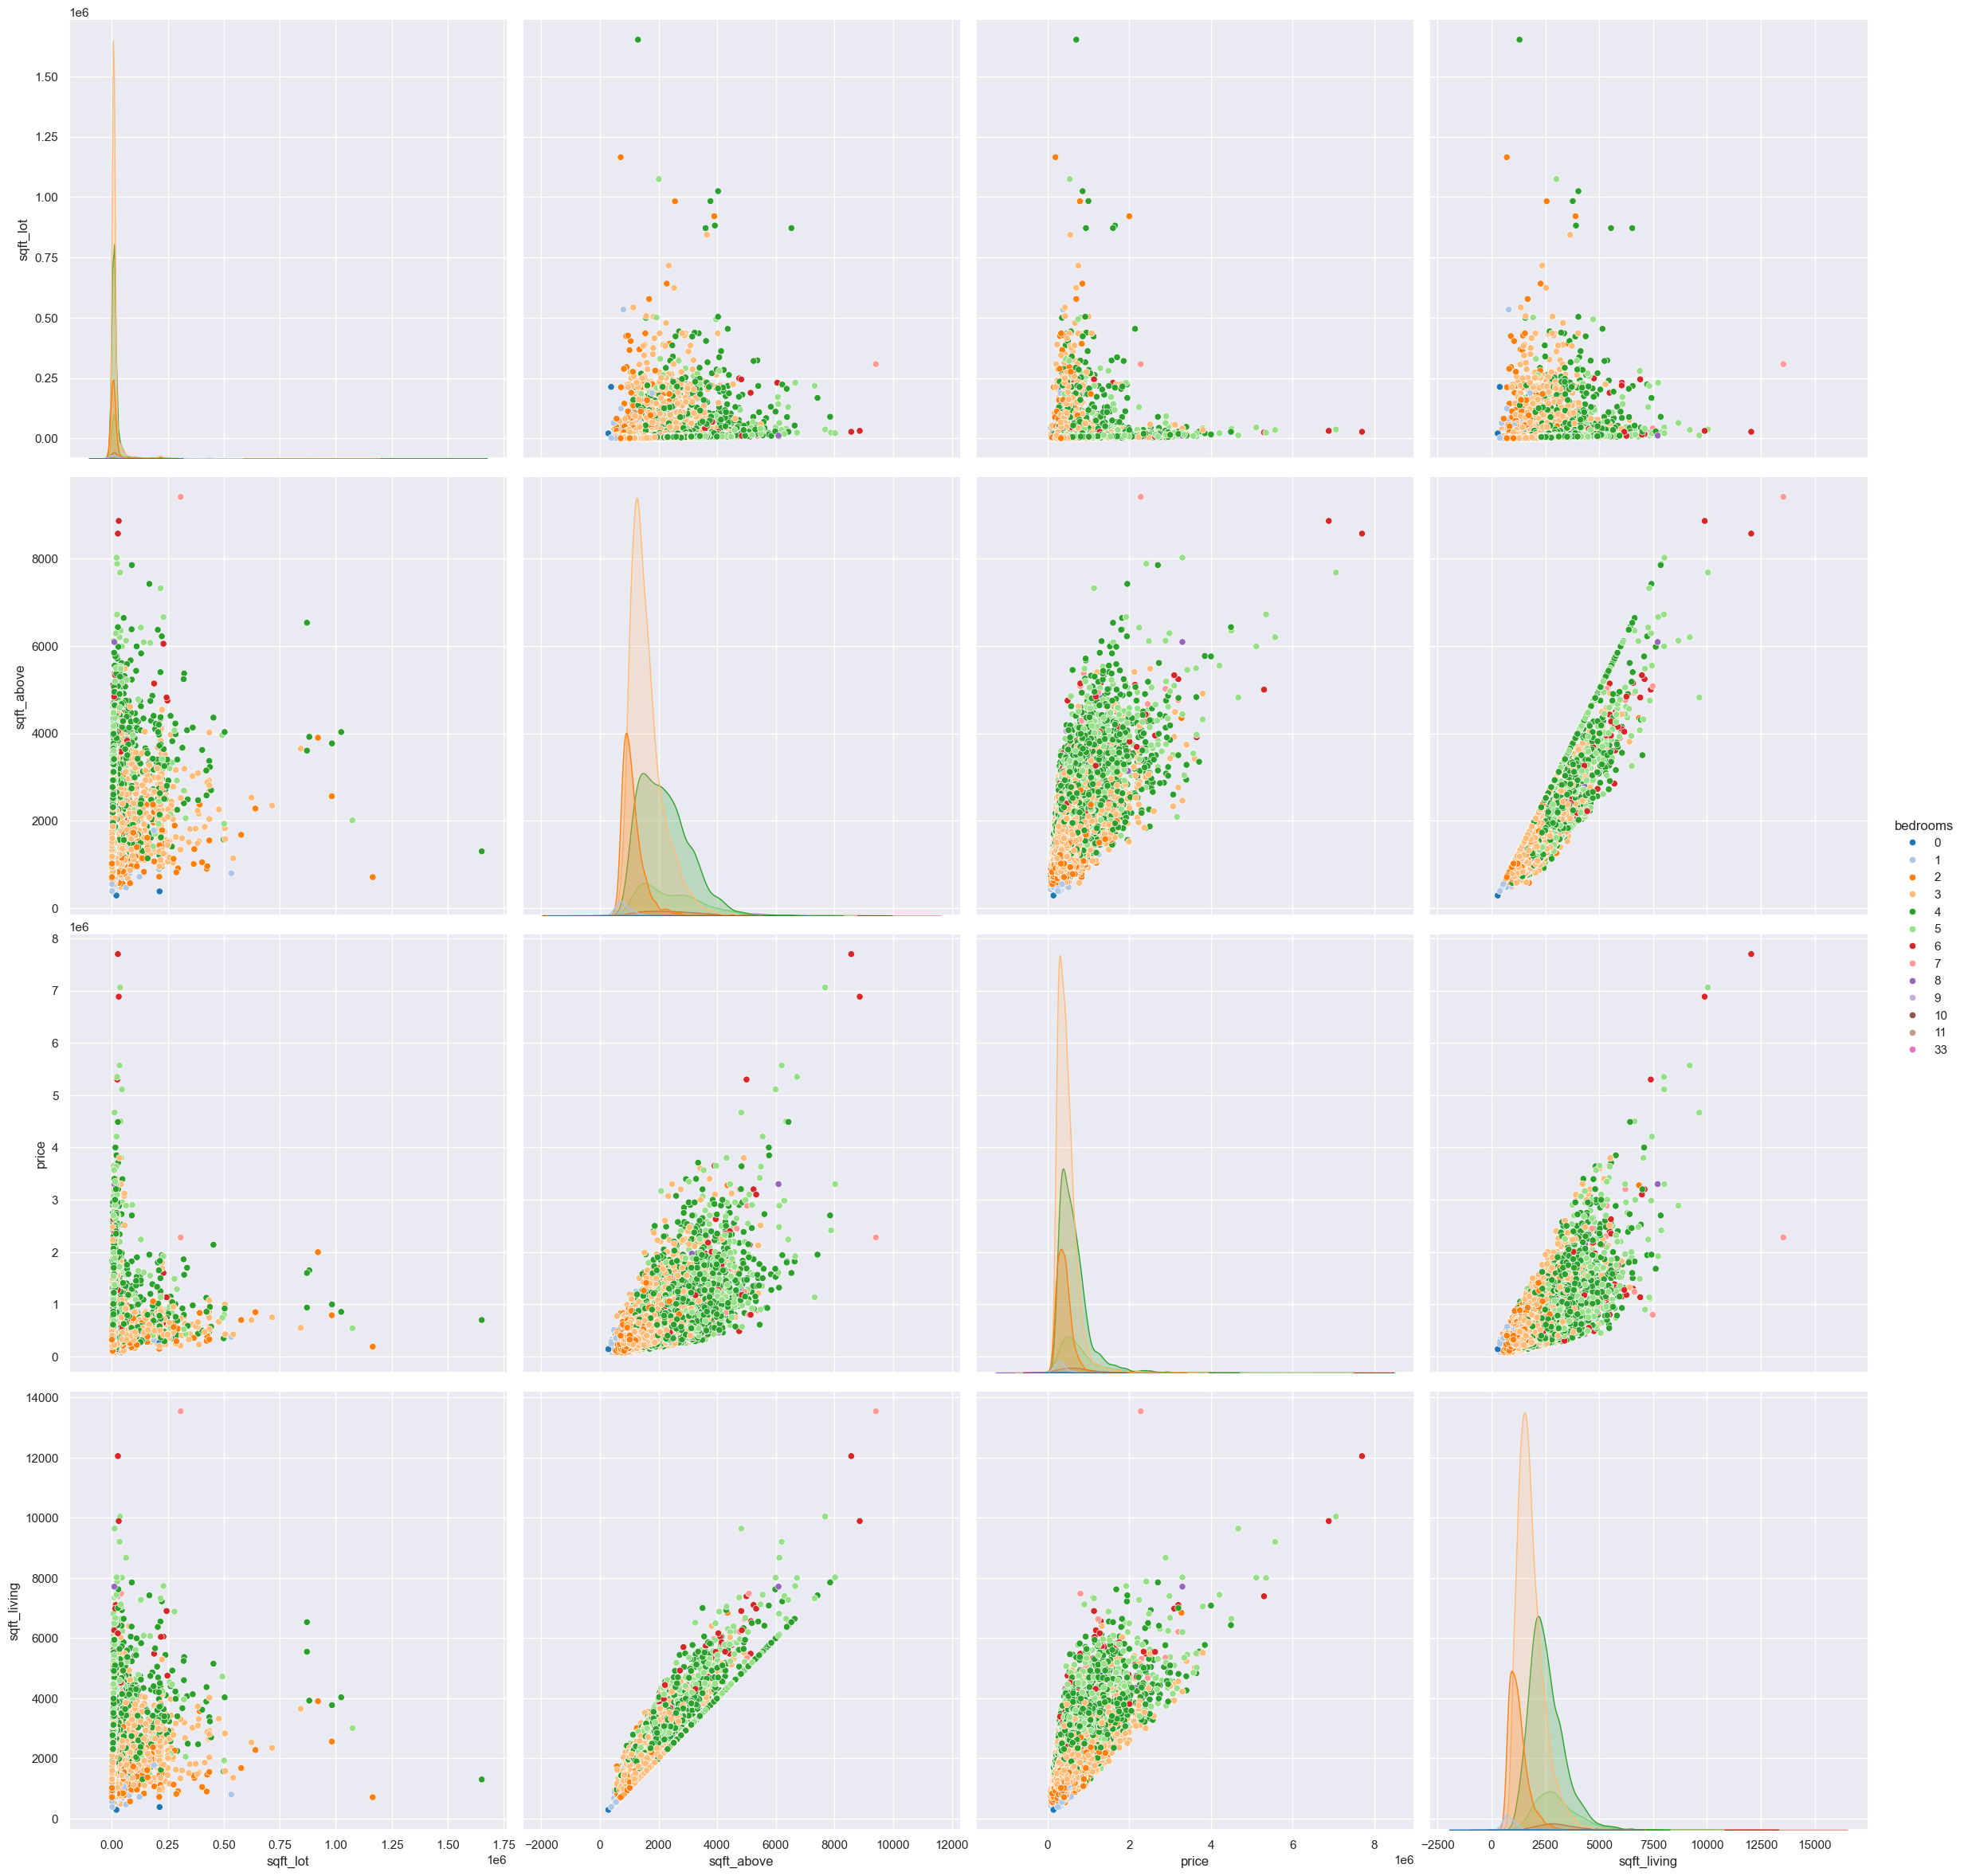

In [44]:
sns.pairplot(data[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], hue='bedrooms', palette='tab20',size=6)

Bathroom Frequencies
bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64


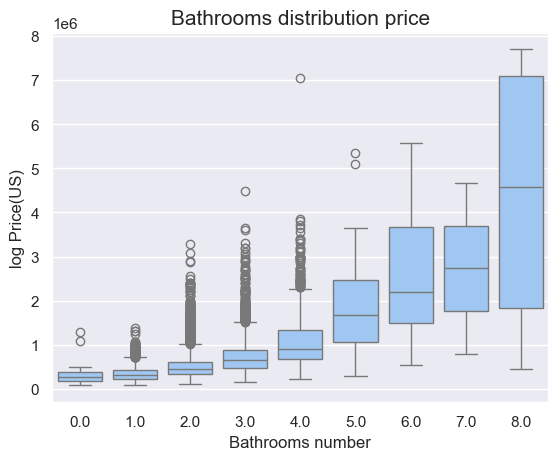

In [68]:
print("Bathroom Frequencies")
print(data["bathrooms"].value_counts())

sns.boxplot(x=data["bathrooms"].round(), y=data['price'])
plt.title("Bathrooms distribution price", fontsize=15)
plt.xlabel("Bathrooms number")
plt.ylabel("log Price(US)")

plt.show()

Grade Frequencies
grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64


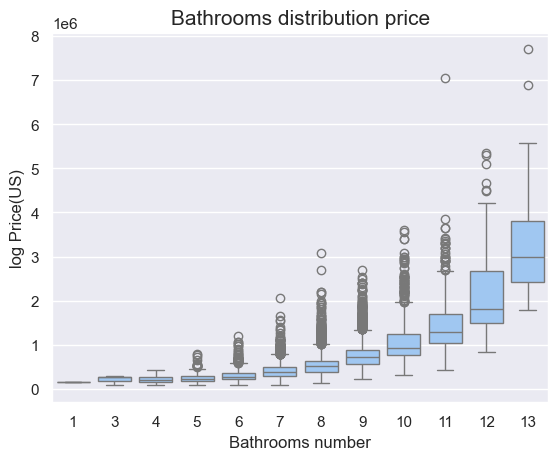

In [69]:
print("Grade Frequencies")
print(data["grade"].value_counts())

sns.boxplot(x=data["grade"], y=data['price'])
plt.title("Bathrooms distribution price", fontsize=15)
plt.xlabel("Bathrooms number")
plt.ylabel("log Price(US)")

plt.show()

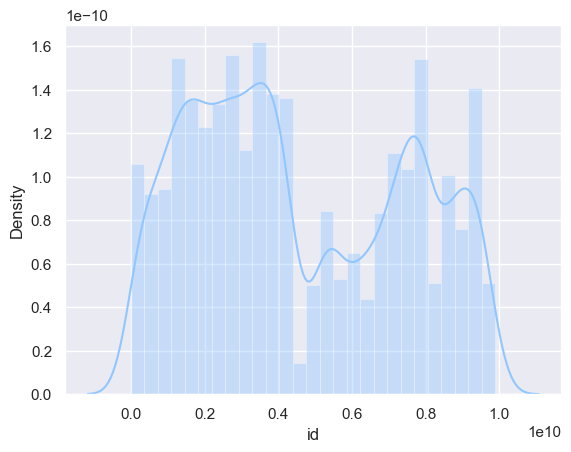

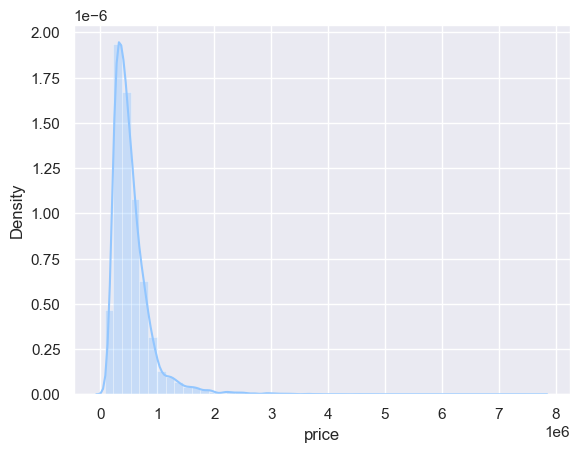

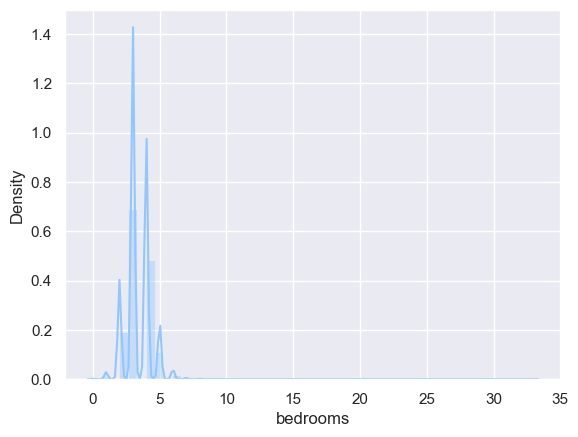

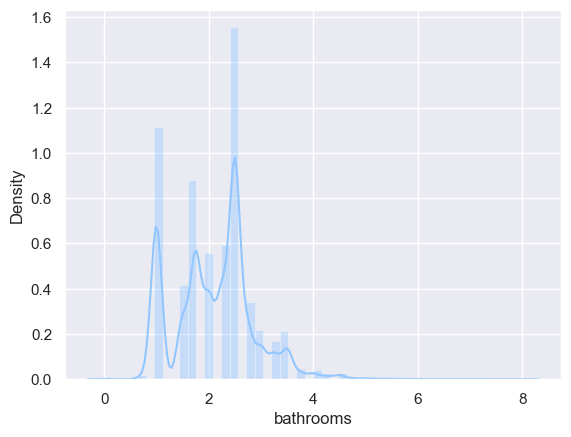

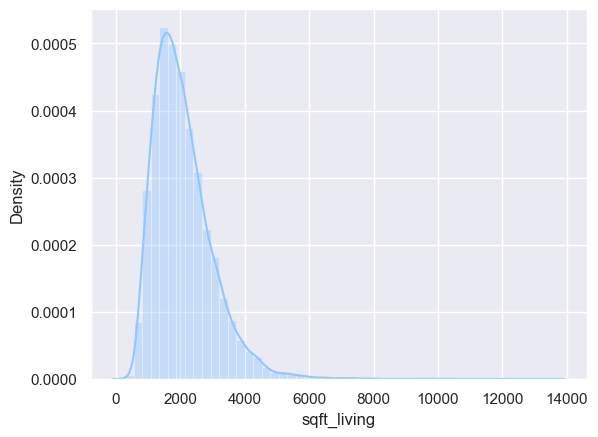

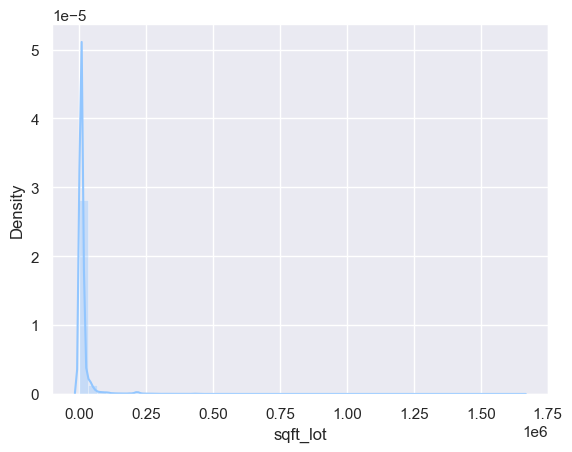

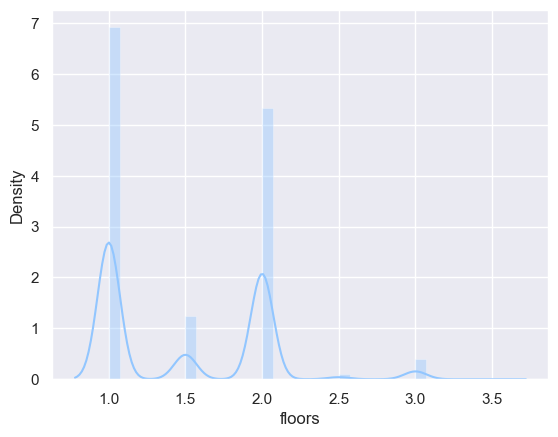

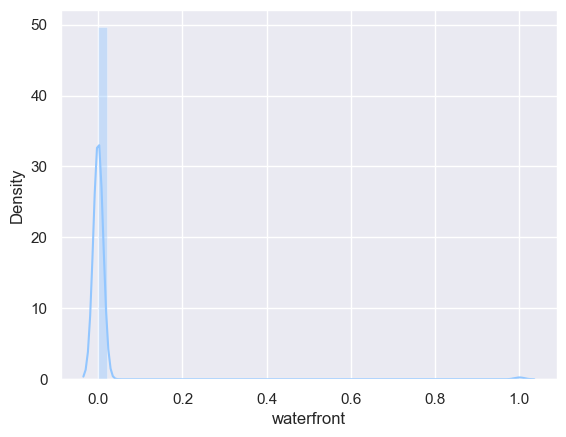

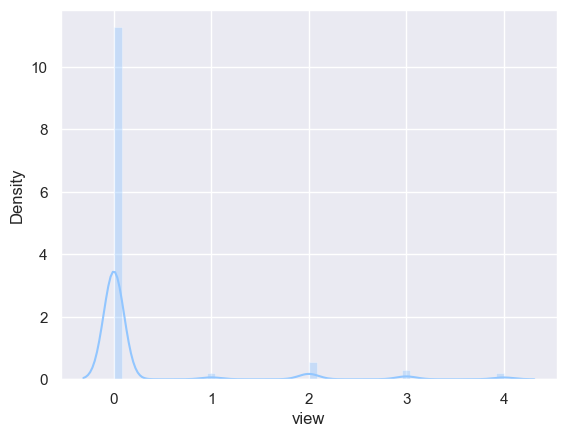

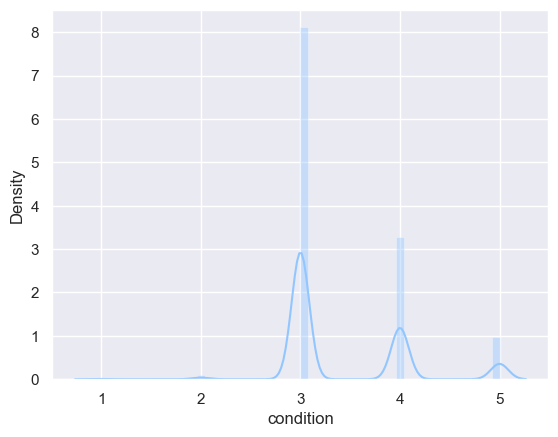

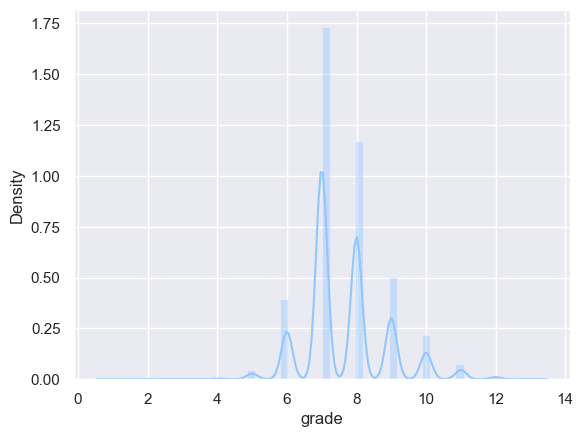

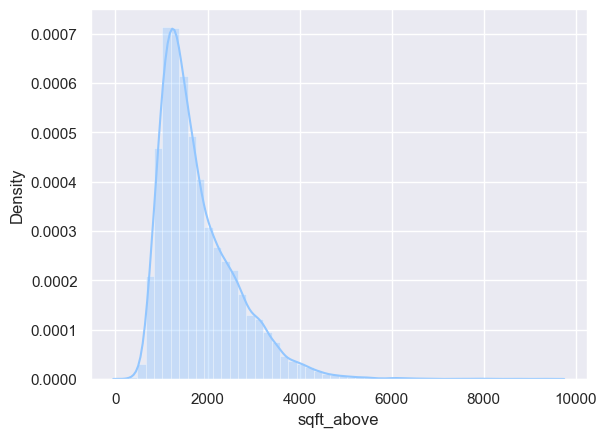

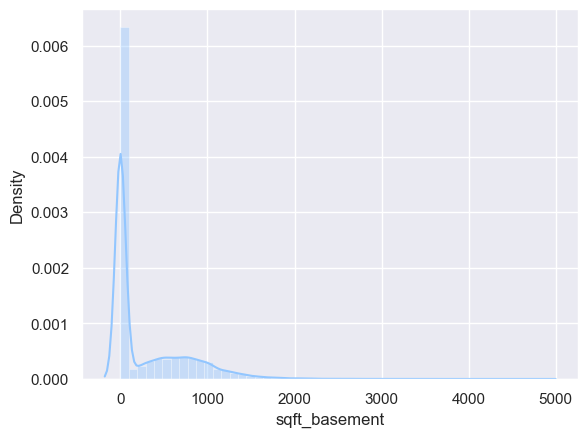

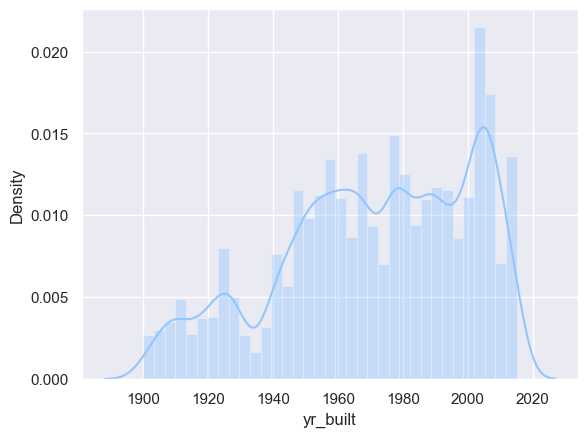

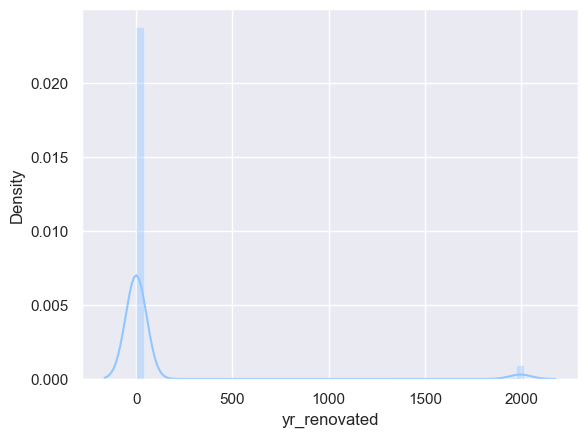

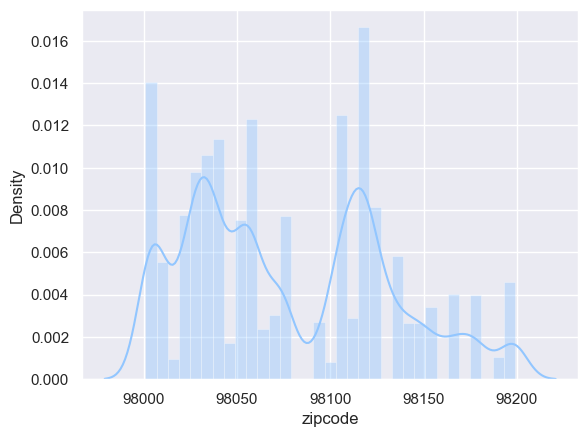

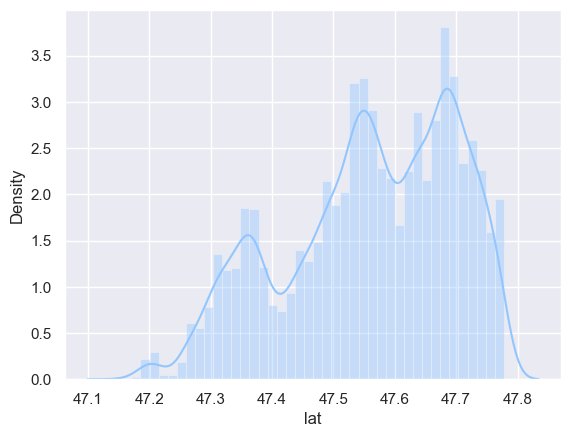

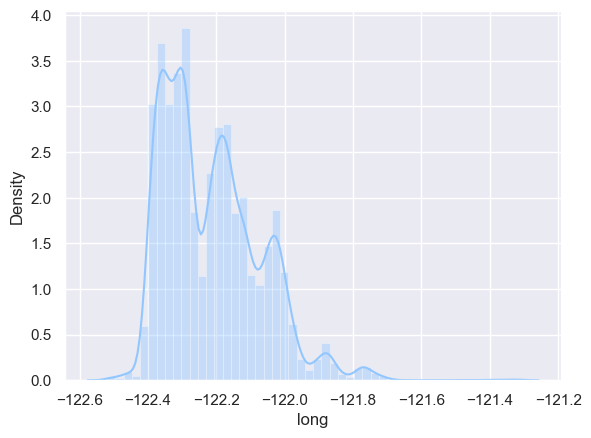

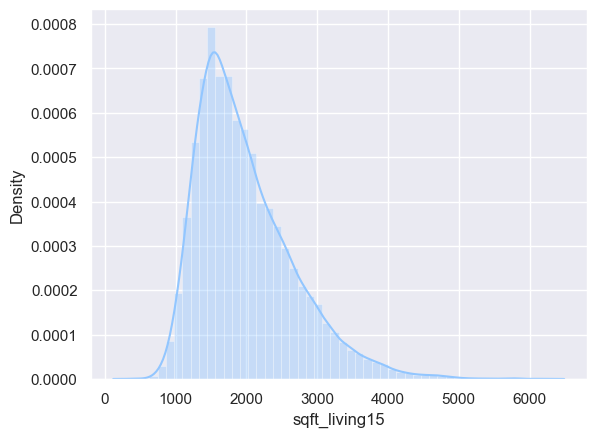

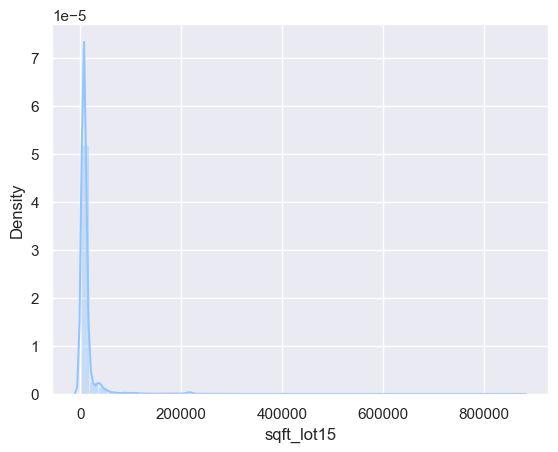

In [77]:
for col in data.select_dtypes(include='number').columns:
    sns.distplot(data[col])
    plt.show()

In [88]:
data = data.drop('date', axis=1)

In [101]:
data.drop('id', axis=1, inplace=True)

## Predictive Modelling

In [95]:
from xgboost import XGBRegressor, plot_importance
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [105]:
X = data.drop("price", axis=1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [107]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.8919649723621259

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

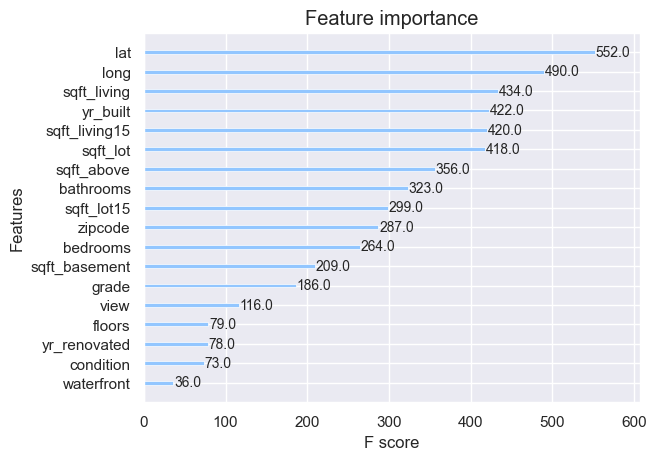

In [108]:
plot_importance(xgb)

## Hyperparameter Tuning Using Optuna

In [123]:
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
    }

    model = XGBRegressor(**params)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

In [126]:
study = optuna.create_study(direction='maximize')  # 'minimize' for mean squared error
study.optimize(objective, n_trials=50)  # You can adjust the number of trials (n_trials) as needed

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')

for key, value in trial.params.items():
    print(f'    {key}: {value}')

best_params = trial.params
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

[I 2023-10-25 03:33:47,729] A new study created in memory with name: no-name-a66c25ab-e539-4a91-a23b-8702ef76108a
[I 2023-10-25 03:33:54,393] Trial 0 finished with value: -15119061668.151638 and parameters: {'n_estimators': 319, 'max_depth': 10, 'learning_rate': 0.06844552144145553, 'subsample': 0.8085196242414058, 'colsample_bytree': 0.977854765308021, 'gamma': 0.9609681818669074, 'reg_alpha': 4.980279201157365, 'reg_lambda': 3.8760714983199396}. Best is trial 0 with value: -15119061668.151638.
[I 2023-10-25 03:34:05,924] Trial 1 finished with value: -15768430618.099972 and parameters: {'n_estimators': 290, 'max_depth': 14, 'learning_rate': 0.09444681743425815, 'subsample': 0.4393756256029615, 'colsample_bytree': 0.9847157359604088, 'gamma': 0.4705447230611979, 'reg_alpha': 8.313385944473993, 'reg_lambda': 8.662527133424634}. Best is trial 0 with value: -15119061668.151638.
[I 2023-10-25 03:34:07,128] Trial 2 finished with value: -16932161121.691015 and parameters: {'n_estimators': 24

Number of finished trials:  50
Best trial:
Value:  -14273862715.374578
Params: 
    n_estimators: 498
    max_depth: 5
    learning_rate: 0.09551217282002045
    subsample: 0.8081680109509939
    colsample_bytree: 0.5585963140316182
    gamma: 0.7932313511833241
    reg_alpha: 2.3616931943469974
    reg_lambda: 6.925678694590793


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5585963140316182, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.7932313511833241,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09551217282002045,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=498, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [127]:
final_model.score(X_test, y_test)

0.9107753291580023

In [132]:
y_pred = final_model.predict(X_test)
mean_squared_error(y_test, y_pred)

11452924034.905403

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

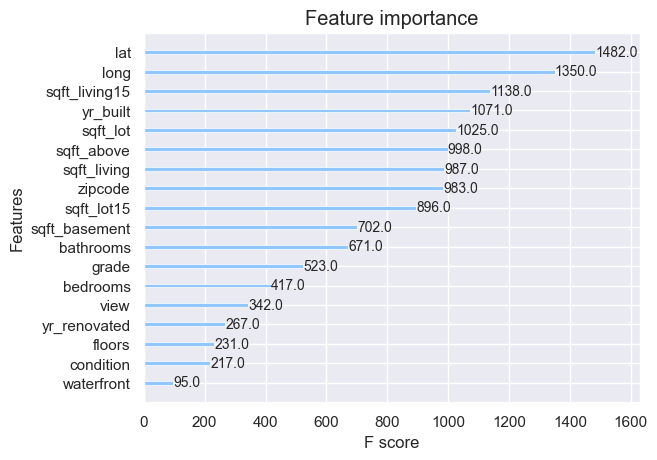

In [135]:
plot_importance(final_model)

In [134]:
import joblib
joblib.dump(final_model, 'app/models/xgbmodel.pkl')

['app/models/xgbmodel.pkl']